In [1]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.preprocessing import label_binarize
import sklearn.tree as tree
from sklearn.preprocessing import LabelEncoder

In [2]:
df = pd.read_csv('combined_data_with_extra_data2.csv')
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]
df

,Run ID,Sex,Age,Country,BMI,Condition,Alistipes,Bacteroides,Bifidobacterium,Blautia,...,Phocaeicola,Paraprevotella,Tidjanibacter,Flavonifractor,Mediterraneibacter,Agathobacter,Ligilactobacillus,Anaerobutyricum,Escherichia,Collinsella
0,ERR1075960,Male,0.0,United States of America,21.22,Health,0.034320,0.320964,0.005633,0.013763,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,ERR1854747,Male,62.0,United Kingdom,28.70,Health,0.038577,0.204173,0.014874,0.008240,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,ERR688529,Male,63.0,Austria,30.90,Health,0.086423,0.066411,0.026879,0.069596,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,ERR1316059,Male,67.0,United States of America,22.15,Health,0.096800,0.233068,0.009989,0.015105,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,SRR5649200,Male,27.0,United States of America,20.80,Health,0.083754,0.196804,0.058733,0.039295,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1640,SRR7690181,male,68.0,USA,28.75,Health,0.000000,0.021739,0.000000,0.000000,...,0.0,0.217391,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1641,SRR7690182,female,69.0,USA,29.05,Bipolar Disorder,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1642,SRR7690183,female,59.0,USA,23.66,Bipolar Disorder,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1643,SRR7690184,female,56.0,USA,43.85,Bipolar Disorder,0.000000,0.020000,0.000000,0.000000,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [3]:
df.columns

Index(['Run ID', 'Sex', 'Age', 'Country', 'BMI', 'Condition', 'Alistipes',
       'Bacteroides', 'Bifidobacterium', 'Blautia', 'Clostridium', 'Dorea',
       'Eubacterium', 'Faecalibacterium', 'Oscillibacter', 'Parabacteroides',
       'Roseburia', 'Ruminococcus', 'Unknown', 'Coprococcus', 'Lachnospira',
       'Oscillospira', 'Subdoligranulum', 'Sutterella', 'Anaerostipes',
       'Streptococcus', 'Akkermansia', 'Anaerofilum', 'Anaerotruncus',
       'Bacillus', 'Barnesiella', 'Desulfovibrio', 'Dialister',
       'Erysipelatoclostridium', 'Holdemania', 'Intestinibacter',
       'Lachnoclostridium', 'Lactobacillus', 'Odoribacter', 'Prevotella',
       'Pseudomonas', 'Sporobacter', 'Ruminiclostridium', 'Corynebacterium',
       'Eggerthella', 'Acinetobacter', 'Parasutterella', 'Veillonella',
       'Uncultured Organism', 'Ruminococcaceae', 'Phocaeicola',
       'Paraprevotella', 'Tidjanibacter', 'Flavonifractor',
       'Mediterraneibacter', 'Agathobacter', 'Ligilactobacillus',
       '

In [4]:
df['Ruminococcus'] += df[['Ruminococcaceae']].sum(axis=1)

In [5]:
df = df.drop(['Ruminococcaceae', 'Unknown', 'Uncultured Organism', 'Run ID'], axis=1)

In [6]:
numeric_cols = df.select_dtypes(include=['number']).drop(columns=['Age', 'BMI'])
# df[df.sum(axis=1) == 0]
zero_rows = numeric_cols.sum(axis=1) == 0
#df = df.drop(zero_rows, axis=0)
df = df[~zero_rows]

In [7]:
# Exclude 'Age' and 'BMI' from numeric columns
numeric_cols = df.select_dtypes(include=['number']).drop(columns=['Age', 'BMI'])

# Normalize only the selected numeric columns
df[numeric_cols.columns] = numeric_cols.div(numeric_cols.sum(axis=1), axis=0)


In [8]:
df.reset_index(drop=True)

,Sex,Age,Country,BMI,Condition,Alistipes,Bacteroides,Bifidobacterium,Blautia,Clostridium,...,Phocaeicola,Paraprevotella,Tidjanibacter,Flavonifractor,Mediterraneibacter,Agathobacter,Ligilactobacillus,Anaerobutyricum,Escherichia,Collinsella
0,Male,0.0,United States of America,21.22,Health,0.062933,0.588542,0.010329,0.025237,0.006070,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Male,62.0,United Kingdom,28.70,Health,0.086461,0.457608,0.033337,0.018467,0.004317,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Male,63.0,Austria,30.90,Health,0.086534,0.066497,0.026914,0.069686,0.082436,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Male,67.0,United States of America,22.15,Health,0.138701,0.333954,0.014312,0.021643,0.004422,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Male,27.0,United States of America,20.80,Health,0.161436,0.379339,0.113208,0.075742,0.002161,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1603,male,58.0,USA,25.80,Bipolar Disorder,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1604,male,68.0,USA,28.75,Health,0.000000,0.090909,0.000000,0.000000,0.000000,...,0.0,0.909091,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1605,female,59.0,USA,23.66,Bipolar Disorder,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1606,female,56.0,USA,43.85,Bipolar Disorder,0.000000,0.125000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [9]:
df['Sex'] = df['Sex'].str.lower()

In [10]:
df['Sex'].unique()

array(['male', 'female', '0'], dtype=object)

In [11]:
len(df[df['Sex'] == '0'])

29

In [12]:
df = df[df['Sex'] != '0']

In [13]:
df['Sex'] = df['Sex'].map({'male': 1, 'female': 0})

In [14]:
df

,Sex,Age,Country,BMI,Condition,Alistipes,Bacteroides,Bifidobacterium,Blautia,Clostridium,...,Phocaeicola,Paraprevotella,Tidjanibacter,Flavonifractor,Mediterraneibacter,Agathobacter,Ligilactobacillus,Anaerobutyricum,Escherichia,Collinsella
0,1,0.0,United States of America,21.22,Health,0.062933,0.588542,0.010329,0.025237,0.006070,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,62.0,United Kingdom,28.70,Health,0.086461,0.457608,0.033337,0.018467,0.004317,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1,63.0,Austria,30.90,Health,0.086534,0.066497,0.026914,0.069686,0.082436,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1,67.0,United States of America,22.15,Health,0.138701,0.333954,0.014312,0.021643,0.004422,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1,27.0,United States of America,20.80,Health,0.161436,0.379339,0.113208,0.075742,0.002161,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1639,1,58.0,USA,25.80,Bipolar Disorder,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1640,1,68.0,USA,28.75,Health,0.000000,0.090909,0.000000,0.000000,0.000000,...,0.0,0.909091,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1642,0,59.0,USA,23.66,Bipolar Disorder,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1643,0,56.0,USA,43.85,Bipolar Disorder,0.000000,0.125000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [15]:
df['Age'].unique()

array([ 0.        , 62.        , 63.        , 67.        , 27.        ,
       34.        , 52.        , 20.        , 26.        , 22.        ,
       31.        , 19.        , 10.        , 29.        , 61.        ,
       39.        ,  0.49589   , 30.        , 57.        , 65.        ,
       47.        , 23.        , 49.        , 46.        , 64.        ,
        4.        , 32.        , 42.        , 28.        , 38.        ,
       59.        , 50.        , 37.        , 54.        , 25.        ,
        9.        , 66.        , 58.        , 35.        , 72.        ,
        2.        , 55.        , 21.        , 24.        ,  2.01644   ,
       18.        , 53.        , 56.        , 33.        , 75.        ,
       80.        , 69.        , 45.        , 43.        , 36.        ,
       60.        , 73.        , 71.        , 70.        , 74.        ,
       68.        , 78.        , 82.        , 81.        , 85.        ,
       76.        , 79.        , 83.        , 48.        , 40.  

In [16]:
df = df[df['Age'] >= 1]

In [17]:
df['Country'].unique()

array(['United Kingdom', 'Austria', 'United States of America',
       'New Zealand', 'Canada', 'China', 'Germany', 'Denmark', 'India',
       'Japan', 'Italy', 'Brazil', 'Finland', 'Australia', 'Sweden',
       'Switzerland', 'Norway', 'Ireland', 'Czech Republic', 'USA'],
      dtype=object)

In [18]:
df['Country'] = df['Country'].replace('USA', 'United States of America')

/var/folders/gw/6zvc4vx95yx8vrymkvc5m8zm0000gn/T/ipykernel_32110/2411329379.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Country'] = df['Country'].replace('USA', 'United States of America')


In [19]:
df['Country'].unique()

array(['United Kingdom', 'Austria', 'United States of America',
       'New Zealand', 'Canada', 'China', 'Germany', 'Denmark', 'India',
       'Japan', 'Italy', 'Brazil', 'Finland', 'Australia', 'Sweden',
       'Switzerland', 'Norway', 'Ireland', 'Czech Republic'], dtype=object)

In [20]:
# dropping country because data still needs to be numeric and I don't want countries assigned to a number 
# 1-19 because there's no hierarchy 
df = df.drop(['Country'], axis=1)

In [21]:
df

,Sex,Age,BMI,Condition,Alistipes,Bacteroides,Bifidobacterium,Blautia,Clostridium,Dorea,...,Phocaeicola,Paraprevotella,Tidjanibacter,Flavonifractor,Mediterraneibacter,Agathobacter,Ligilactobacillus,Anaerobutyricum,Escherichia,Collinsella
1,1,62.0,28.70,Health,0.086461,0.457608,0.033337,0.018467,0.004317,0.001799,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1,63.0,30.90,Health,0.086534,0.066497,0.026914,0.069686,0.082436,0.043823,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1,67.0,22.15,Health,0.138701,0.333954,0.014312,0.021643,0.004422,0.000233,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1,27.0,20.80,Health,0.161436,0.379339,0.113208,0.075742,0.002161,0.004188,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,1,34.0,27.30,Health,0.051193,0.300099,0.118299,0.034665,0.005867,0.016604,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1639,1,58.0,25.80,Bipolar Disorder,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1640,1,68.0,28.75,Health,0.000000,0.090909,0.000000,0.000000,0.000000,0.000000,...,0.0,0.909091,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1642,0,59.0,23.66,Bipolar Disorder,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1643,0,56.0,43.85,Bipolar Disorder,0.000000,0.125000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [22]:
df['BMI'].describe()

count    1546.00000
mean       23.73138
std         8.79228
min         0.00000
25%        21.45000
50%        24.31500
75%        28.12000
max        54.08000
Name: BMI, dtype: float64

In [23]:
df = df[df['BMI'] != 0]

In [24]:
df['BMI'].describe()

count    1423.000000
mean       25.782652
std         5.573726
min        14.230000
25%        22.050000
50%        24.560000
75%        28.355000
max        54.080000
Name: BMI, dtype: float64

In [25]:
df

,Sex,Age,BMI,Condition,Alistipes,Bacteroides,Bifidobacterium,Blautia,Clostridium,Dorea,...,Phocaeicola,Paraprevotella,Tidjanibacter,Flavonifractor,Mediterraneibacter,Agathobacter,Ligilactobacillus,Anaerobutyricum,Escherichia,Collinsella
1,1,62.0,28.70,Health,0.086461,0.457608,0.033337,0.018467,0.004317,0.001799,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1,63.0,30.90,Health,0.086534,0.066497,0.026914,0.069686,0.082436,0.043823,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1,67.0,22.15,Health,0.138701,0.333954,0.014312,0.021643,0.004422,0.000233,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1,27.0,20.80,Health,0.161436,0.379339,0.113208,0.075742,0.002161,0.004188,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,1,34.0,27.30,Health,0.051193,0.300099,0.118299,0.034665,0.005867,0.016604,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1639,1,58.0,25.80,Bipolar Disorder,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1640,1,68.0,28.75,Health,0.000000,0.090909,0.000000,0.000000,0.000000,0.000000,...,0.0,0.909091,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1642,0,59.0,23.66,Bipolar Disorder,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1643,0,56.0,43.85,Bipolar Disorder,0.000000,0.125000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [26]:
df_label = df['Condition']
df_label_string = df_label.unique()
df_label_string

array(['Health', 'Bipolar Disorder, Depression, Schizophrenia',
       'Bipolar Disorder, Depression, Epilepsy, Schizophrenia',
       'Bipolar Disorder', 'Epilepsy'], dtype=object)

In [27]:
df['Condition'].unique()

array(['Health', 'Bipolar Disorder, Depression, Schizophrenia',
       'Bipolar Disorder, Depression, Epilepsy, Schizophrenia',
       'Bipolar Disorder', 'Epilepsy'], dtype=object)

In [28]:
dictionary = {'Health': 0,
              'Bipolar Disorder, Depression, Schizophrenia': 1,
              'Bipolar Disorder, Depression, Epilepsy, Schizophrenia': 2,
              'Bipolar Disorder': 3,
              'Epilepsy': 4,
}

In [29]:
y = df_label.map(dictionary)

In [30]:
X = df.drop(['Condition'], axis=1)
X

,Sex,Age,BMI,Alistipes,Bacteroides,Bifidobacterium,Blautia,Clostridium,Dorea,Eubacterium,...,Phocaeicola,Paraprevotella,Tidjanibacter,Flavonifractor,Mediterraneibacter,Agathobacter,Ligilactobacillus,Anaerobutyricum,Escherichia,Collinsella
1,1,62.0,28.70,0.086461,0.457608,0.033337,0.018467,0.004317,0.001799,0.041012,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1,63.0,30.90,0.086534,0.066497,0.026914,0.069686,0.082436,0.043823,0.257714,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1,67.0,22.15,0.138701,0.333954,0.014312,0.021643,0.004422,0.000233,0.005934,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1,27.0,20.80,0.161436,0.379339,0.113208,0.075742,0.002161,0.004188,0.030981,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,1,34.0,27.30,0.051193,0.300099,0.118299,0.034665,0.005867,0.016604,0.026881,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1639,1,58.0,25.80,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.714286,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1640,1,68.0,28.75,0.000000,0.090909,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.909091,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1642,0,59.0,23.66,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1643,0,56.0,43.85,0.000000,0.125000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=22)

In [32]:
dt = DecisionTreeClassifier(criterion='gini', splitter='best', random_state=42)
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)

In [33]:
accuracy = accuracy_score(y_test, y_pred)
np.round(accuracy, decimals=4)

0.9333

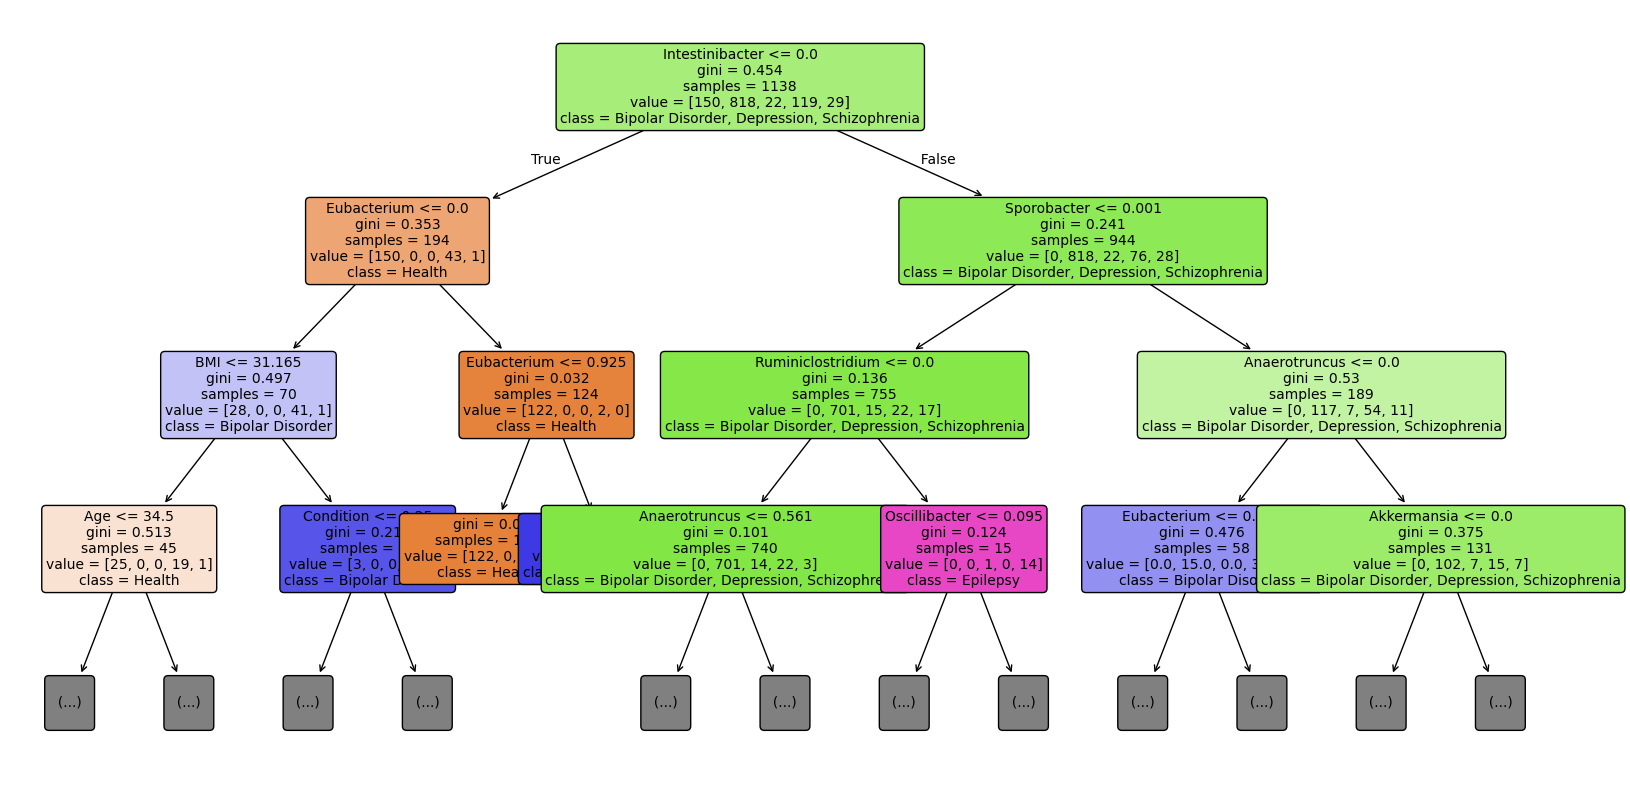

In [34]:
plt.figure(figsize=(20, 10))
tree.plot_tree(dt, feature_names=df.columns.tolist(), class_names=df_label_string.tolist(), 
               filled=True, rounded=True, max_depth=3, fontsize=10)
plt.show()

In [35]:
# plt.figure(figsize=(20, 10))
# tree.plot_tree(dt, feature_names=df.columns, class_names=df_label_string, 
#                filled=True, rounded=True, max_depth=3, fontsize=10)
# plt.show()

In [36]:
y_prob = dt.predict_proba(X_test)
# rows are samples and the columns are the probabilities of that sample belonging to the corresponding class 
y_prob[1]

array([0., 1., 0., 0., 0.])

In [37]:
y_test_array = np.array(y_test)
y_test_bin = label_binarize(y_test_array, classes=np.arange(5))  # Shape: (num_samples, 8)
y_test_bin[1]

array([0, 1, 0, 0, 0])

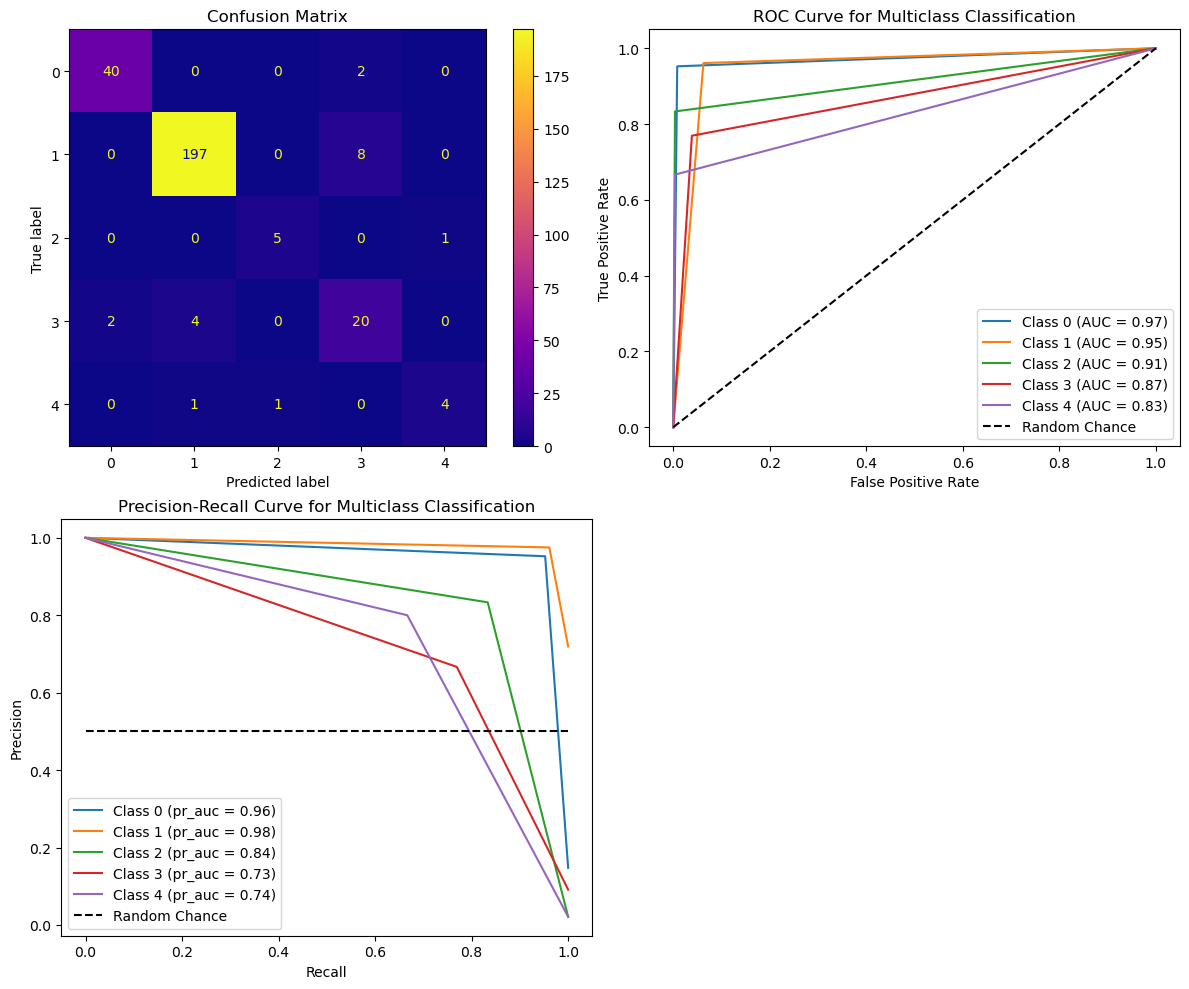

In [42]:
fig, axs = plt.subplots(2, 2, figsize=(12, 10))  # 2 rows, 2 columns

# confusion matrix
cm = confusion_matrix(y_test, y_pred)
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm)
cm_display.plot(cmap='plasma', ax=axs[0, 0])  # Top-left subplot
axs[0, 0].set_title('Confusion Matrix')

# roc curve
for i in range(5): 
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_prob[:, i])
    roc_auc = auc(fpr, tpr)
    axs[0, 1].plot(fpr, tpr, label=f'Class {i} (AUC = {roc_auc:.2f})')

axs[0, 1].plot([0, 1], [0, 1], 'k--', label='Random Chance')
axs[0, 1].set_xlabel('False Positive Rate')
axs[0, 1].set_ylabel('True Positive Rate')
axs[0, 1].set_title('ROC Curve for Multiclass Classification')
axs[0, 1].legend()

# precision-recall curve
for i in range(5): 
    precision, recall, _ = precision_recall_curve(y_test_bin[:, i], y_prob[:, i])
    pr_auc = auc(recall, precision)
    axs[1, 0].plot(recall, precision, label=f'Class {i} (pr_auc = {pr_auc:.2f})')

axs[1, 0].plot([0, 1], [0.5, 0.5], 'k--', label='Random Chance')
axs[1, 0].set_xlabel('Recall')
axs[1, 0].set_ylabel('Precision')
axs[1, 0].set_title('Precision-Recall Curve for Multiclass Classification')
axs[1, 0].legend()

axs[1, 1].axis('off')

plt.tight_layout()
#plt.savefig('dt_psych_sex_graphs.jpg')
plt.show()


In [39]:
from sklearn.tree import export_graphviz
import pydotplus
from six import StringIO
from IPython.display import Image

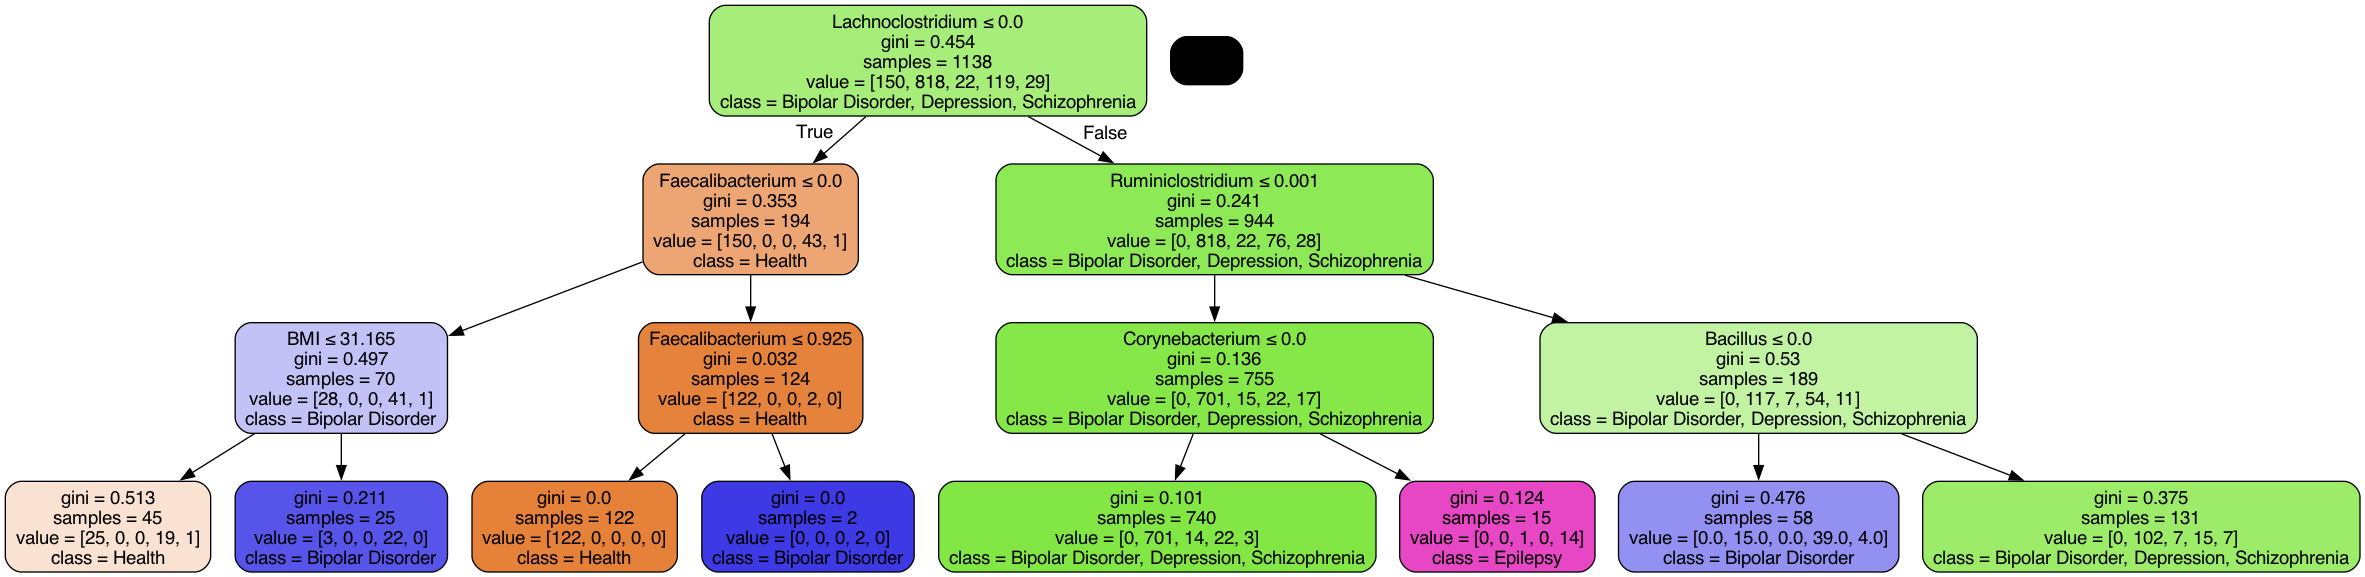

In [41]:
dt1 = DecisionTreeClassifier(criterion='gini', splitter='best', random_state=42, max_depth=3)
dt1.fit(X_train, y_train)
dot_data = StringIO()
export_graphviz(dt1, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True, feature_names = X.columns,class_names=df_label_string)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
#graph.write_png('dt_psych_sex.jpg')
Image(graph.create_png())